# K Means Clustering Project

For this project I will be looking at University data and will use K Means Clustering to cluster Universities into two groups: Private and Public.

Note that this data is lableled, however I will only use the labels to get an idea of how well the algorithm performed. I am aware that this type of evaluation will not happen in a real world setting.

# Data

A data frame with 777 observations on the following 18 variables.
* Private: A factor with levels No and Yes indicating private or public university
* Apps: Number of applications received
* Accept: Number of applications accepted
* Enroll: Number of new students enrolled
* Top10perc: Pct. new students from top 10% of H.S. class
* Top25perc: Pct. new students from top 25% of H.S. class
* F.Undergrad: Number of fulltime undergraduates
* P.Undergrad: Number of parttime undergraduates
* Outstate: Out-of-state tuition
* Room.Board: Room and board costs
* Books: Estimated book costs
* Personal: Estimated personal spending
* PhD: Pct. of faculty with Ph.D.’s
* Terminal: Pct. of faculty with terminal degree
* S.F.Ratio: Student/faculty ratio
* perc.alumni: Pct. alumni who donate
* Expend: Instructional expenditure per student
* Grad.Rate: Graduation rate

# Setup

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [170]:
df=pd.read_csv("College_Data")

In [171]:
df.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

# EDA

Text(0.5, 1.0, 'Room and Board Costs vs Graduation Rate')

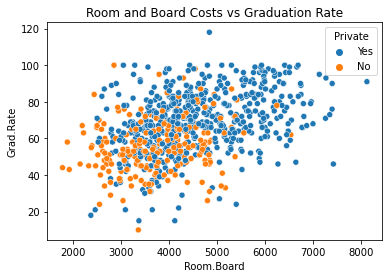

In [173]:
sns.scatterplot(y="Grad.Rate",x="Room.Board",data = df,hue='Private')
plt.title("Room and Board Costs vs Graduation Rate")

Text(0.5, 1.0, 'Out of State Tuition vs Number of fulltime undergraduates ')

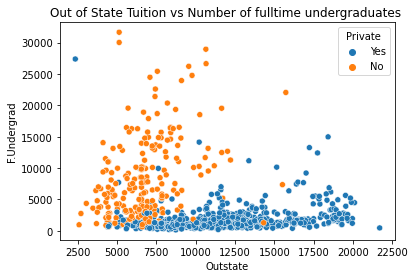

In [174]:
sns.scatterplot(y="F.Undergrad",x="Outstate",data = df,hue='Private')
plt.title("Out of State Tuition vs Number of fulltime undergraduates ")

Text(0.5, 1.0, 'Graduation Rate Histogram')

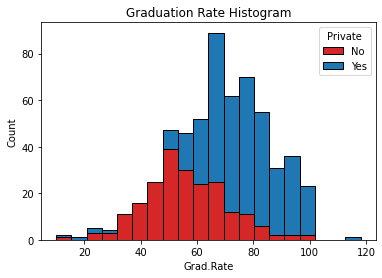

In [175]:
sns.histplot(x="Grad.Rate",data = df,hue="Private",alpha=1,hue_order = ['No','Yes'],palette={"C10","C3"})
plt.title("Graduation Rate Histogram")

It seems that there is a school with a graduation rate greater than 100. Let's fix it.

Text(0.5, 1.0, 'Graduation Rate Histogram')

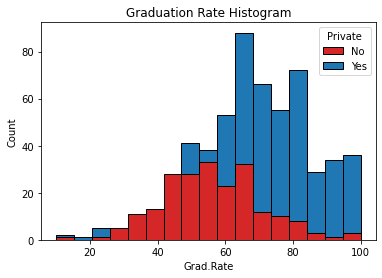

In [176]:
#fix the data entry
df.loc[df["Grad.Rate"] > 100, "Grad.Rate"] = 100

sns.histplot(x="Grad.Rate",data = df,hue="Private",alpha=1,hue_order = ['No','Yes'],palette={"C10","C3"})
plt.title("Graduation Rate Histogram")

# K Means Clustering

In [177]:
from sklearn.cluster import KMeans

In [178]:
X = df.drop(["Private","Unnamed: 0"],axis=1)
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

KMeans(n_clusters=2)

Text(0.5, 1.0, 'ORIGINAL')

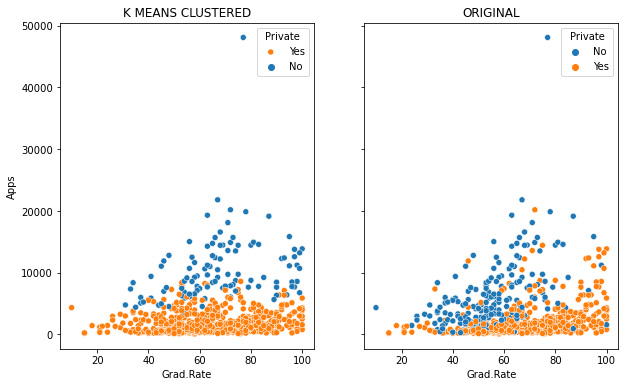

In [179]:
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True,figsize = (10,6))

sns.scatterplot(ax=ax1,y="Apps",x="Grad.Rate",data = df,hue=kmeans.labels_)
sns.scatterplot(ax=ax2,y="Apps",x="Grad.Rate",data = df,hue="Private",hue_order = ['No','Yes'])
ax1.legend(title='Private', loc='upper right', labels=['Yes', 'No'])
ax1.set_title("K MEANS CLUSTERED")
ax2.set_title("ORIGINAL")


In [180]:
df["Cluster"]=kmeans.labels_
df["Private_num"] = df['Private'].apply(lambda x: 1 if x=="Yes" else 0)
df.head(3)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,...,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Cluster,Private_num
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,...,450,2200,70,78,18.1,12,7041,60,1,1
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,...,750,1500,29,30,12.2,16,10527,56,1,1
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,...,400,1165,53,66,12.9,30,8735,54,1,1


In [181]:
from sklearn.metrics import classification_report,confusion_matrix

In [182]:
print(confusion_matrix(df["Private_num"],df["Cluster"]))
print(classification_report(df["Private_num"],df["Cluster"]))

[[ 74 138]
 [ 34 531]]
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       565

    accuracy                           0.78       777
   macro avg       0.74      0.64      0.66       777
weighted avg       0.76      0.78      0.75       777

